# Import necessary libraries

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from matplotlib import pyplot as plt

# Import data

In [2]:
bank_data = pd.read_csv('bank-full.csv',sep=';')
bank_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


# Data Understanding

In [3]:
bank_data.shape

(45211, 17)

In [4]:
bank_data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

<AxesSubplot:xlabel='y', ylabel='count'>

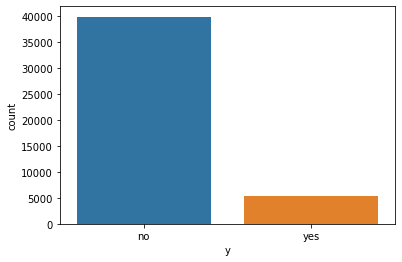

In [6]:
sns.countplot(bank_data['y'])

In [7]:
pd.crosstab(index=bank_data['job'], columns = bank_data['y'])

y,no,yes
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [8]:
pd.crosstab(index=bank_data['y'], columns = bank_data['marital'])

marital,divorced,married,single
y,,,
no,4585,24459,10878
yes,622,2755,1912


In [9]:
pd.crosstab(index=bank_data['y'], columns = bank_data['education'])

education,primary,secondary,tertiary,unknown
y,,,,
no,6260,20752,11305,1605
yes,591,2450,1996,252


# Data Preprocessing

In [10]:
bank_data1=bank_data.drop(labels=['day','month'],axis=1)
bank_data1.head()

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,-1,0,unknown,no


In [11]:
bank_data1=pd.get_dummies(bank_data1,drop_first=True)

In [12]:
bank_data1

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,58,2143,261,1,-1,0,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,33,2,76,1,-1,0,0,1,0,0,...,0,0,1,1,0,1,0,0,1,0
3,47,1506,92,1,-1,0,1,0,0,0,...,1,0,1,0,0,1,0,0,1,0
4,33,1,198,1,-1,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45207,71,1729,456,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
45208,72,5715,1127,5,184,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
45209,57,668,508,4,-1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [13]:
bank_data1.isna().sum()

age                    0
balance                0
duration               0
campaign               0
pdays                  0
previous               0
job_blue-collar        0
job_entrepreneur       0
job_housemaid          0
job_management         0
job_retired            0
job_self-employed      0
job_services           0
job_student            0
job_technician         0
job_unemployed         0
job_unknown            0
marital_married        0
marital_single         0
education_secondary    0
education_tertiary     0
education_unknown      0
default_yes            0
housing_yes            0
loan_yes               0
contact_telephone      0
contact_unknown        0
poutcome_other         0
poutcome_success       0
poutcome_unknown       0
y_yes                  0
dtype: int64

In [14]:
bank_data1.dtypes

age                    int64
balance                int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
job_blue-collar        uint8
job_entrepreneur       uint8
job_housemaid          uint8
job_management         uint8
job_retired            uint8
job_self-employed      uint8
job_services           uint8
job_student            uint8
job_technician         uint8
job_unemployed         uint8
job_unknown            uint8
marital_married        uint8
marital_single         uint8
education_secondary    uint8
education_tertiary     uint8
education_unknown      uint8
default_yes            uint8
housing_yes            uint8
loan_yes               uint8
contact_telephone      uint8
contact_unknown        uint8
poutcome_other         uint8
poutcome_success       uint8
poutcome_unknown       uint8
y_yes                  uint8
dtype: object

# Data Preparation

In [15]:
x = bank_data1.drop(labels='y_yes', axis=1)
x

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,0,0,0,1,...,1,0,0,1,0,0,1,0,0,1
1,44,29,151,1,-1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
2,33,2,76,1,-1,0,0,1,0,0,...,0,0,0,1,1,0,1,0,0,1
3,47,1506,92,1,-1,0,1,0,0,0,...,0,1,0,1,0,0,1,0,0,1
4,33,1,198,1,-1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
45209,57,668,508,4,-1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [16]:
y = bank_data1[['y_yes']]

In [17]:
y

,y_yes
0,0
1,0
2,0
3,0
4,0
...,...
45206,1
45207,1
45208,1
45209,0


In [18]:
x.shape,y.shape

((45211, 30), (45211, 1))

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=123)

In [30]:
x_train

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown
28686,29,-205,194,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9304,53,0,285,2,-1,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,1
41425,55,2587,328,2,94,2,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
44803,30,0,214,2,-1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
5878,30,529,107,3,-1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7763,50,3674,886,3,-1,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
15377,36,635,359,1,-1,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
17730,43,3664,274,1,-1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
28030,55,8585,201,2,-1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [31]:
x_train.shape, y_train.shape

((36168, 30), (36168, 1))

In [32]:
x_test.shape, y_test.shape

((9043, 30), (9043, 1))

# Model Building

In [33]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [34]:
log_model.coef_

array([[-1.50827501e-02,  1.28020555e-05,  3.95762796e-03,
        -1.36099991e-01,  2.27681664e-04,  2.08819311e-02,
        -4.69974291e-01, -4.99636483e-02, -1.98630121e-02,
        -2.59832352e-03,  3.04428712e-01, -3.19267781e-02,
        -1.73252826e-01,  5.33661240e-02, -1.31079141e-01,
         4.70329954e-03,  6.98110978e-03, -3.14026991e-01,
        -2.60766870e-01, -4.95082156e-01,  7.15229099e-02,
         1.42794846e-02, -3.86209171e-02, -1.22592267e+00,
        -3.52416180e-01,  9.72791742e-02, -7.97569073e-01,
        -5.85826552e-02,  5.91696855e-01, -8.31716985e-01]])

In [35]:
log_model.intercept_

array([-0.5623501])

In [36]:
log_model.predict_proba(x_train)

array([[0.89395017, 0.10604983],
       [0.98441056, 0.01558944],
       [0.49866075, 0.50133925],
       ...,
       [0.8499716 , 0.1500284 ],
       [0.85847749, 0.14152251],
       [0.97535859, 0.02464141]])

# Model Prediction

### Training Data

In [37]:
y_pred_train = log_model.predict(x_train)
y_pred_train

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve
print('Accuracy Score : ',accuracy_score(y_train,y_pred_train))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_train,y_pred_train))

Accuracy Score :  0.8949347489493474
-------------------------------------------
Confusion Matrix:
 [[31307   629]
 [ 3171  1061]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     31936
           1       0.63      0.25      0.36      4232

    accuracy                           0.89     36168
   macro avg       0.77      0.62      0.65     36168
weighted avg       0.88      0.89      0.87     36168



In [39]:
from sklearn.metrics import roc_curve

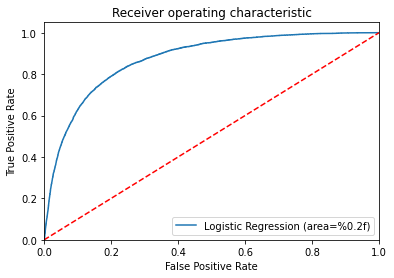

In [40]:
fpr, tpr, thresholds = roc_curve(y,log_model.predict_proba(x)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

### Testing Data

In [41]:
y_pred_test = log_model.predict(x_test)
y_pred_test

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [42]:
print('Accuracy Score : ',accuracy_score(y_test,y_pred_test))
print('-------------------------------------------')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))
print('-------------------------------------------')
print('Classification Report:\n',classification_report(y_test,y_pred_test))

Accuracy Score :  0.8941722879575362
-------------------------------------------
Confusion Matrix:
 [[7826  160]
 [ 797  260]]
-------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7986
           1       0.62      0.25      0.35      1057

    accuracy                           0.89      9043
   macro avg       0.76      0.61      0.65      9043
weighted avg       0.87      0.89      0.87      9043

